In [506]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

### Gather

In [507]:
data = pd.read_csv('survey_results_public.csv', index_col="Respondent")
#schema = pd.read_csv('survey_results_schema.csv', error_bad_lines=False)

### Preliminary Wrangling

The interest group are professional developers employed full-time.

In [508]:
# Selecting group of interest
df = data.query('Professional == "Professional developer" and EmploymentStatus == "Employed full-time" ')
df.head()

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
Respondent,,,,,,,,,,,,,,,,,,,,,
3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,"Privately-held limited company, not in startup...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,Pre-series A startup,...,Somewhat agree,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN
9,Professional developer,"Yes, I program as a hobby",Colombia,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","5,000 to 9,999 employees","Privately-held limited company, not in startup...",...,Strongly disagree,Male,A bachelor's degree,Hispanic or Latino/Latina,Somewhat agree,Strongly agree,Disagree,Strongly agree,NaN,NaN
12,Professional developer,No,Canada,No,Employed full-time,Bachelor's degree,Computer science or software engineering,A few days each month,100 to 499 employees,"Privately-held limited company, not in startup...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Assess

Assessing the columns that will be used to understand the importance of education.

In [509]:
# Interest columns

cols_int = ['Professional','EmploymentStatus', 'FormalEducation','Salary','CareerSatisfaction', 
            'EducationImportant', 'ImportantHiringEducation']

df = df[cols_int]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30211 entries, 3 to 51391
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Professional              30211 non-null  object 
 1   EmploymentStatus          30211 non-null  object 
 2   FormalEducation           30211 non-null  object 
 3   Salary                    12444 non-null  float64
 4   CareerSatisfaction        29935 non-null  float64
 5   EducationImportant        19476 non-null  object 
 6   ImportantHiringEducation  17627 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.8+ MB


In [510]:
df['ImportantHiringEducation'].value_counts()

Somewhat important      6873
Not very important      5282
Important               3160
Not at all important    1823
Very important           489
Name: ImportantHiringEducation, dtype: int64

In [511]:
df['EducationImportant'].value_counts()

Somewhat important      5281
Important               5043
Not very important      3945
Very important          3147
Not at all important    2060
Name: EducationImportant, dtype: int64

In [512]:
## Create a ordinal categorical type cat1

cat1 = CategoricalDtype(categories=['Not at all important', 'Not very important', 'Somewhat important','Important', 'Very important'],
                      ordered = True)

df.loc[:,['ImportantHiringEducation', 'EducationImportant']] = df.loc[:,['ImportantHiringEducation', 'EducationImportant']].astype(cat1, copy=True)


In [513]:
df['CareerSatisfaction'].value_counts()        

8.0     8113
7.0     6836
9.0     4139
10.0    3766
6.0     3232
5.0     1939
4.0      827
3.0      586
2.0      240
0.0      163
1.0       94
Name: CareerSatisfaction, dtype: int64

In [514]:
#df['NA_CareerSatisfaction']
df = df.assign(NA_CareerSatisfaction = df['CareerSatisfaction'].notnull().values)

In [515]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30211 entries, 3 to 51391
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Professional              30211 non-null  object  
 1   EmploymentStatus          30211 non-null  object  
 2   FormalEducation           30211 non-null  object  
 3   Salary                    12444 non-null  float64 
 4   CareerSatisfaction        29935 non-null  float64 
 5   EducationImportant        19476 non-null  category
 6   ImportantHiringEducation  17627 non-null  category
 7   NA_CareerSatisfaction     30211 non-null  bool    
dtypes: bool(1), category(2), float64(2), object(3)
memory usage: 1.5+ MB


In [516]:
df['Salary'].describe()

count     12444.000000
mean      57353.913736
std       39882.230088
min           0.000000
25%       27956.989247
50%       51254.032258
75%       80500.000000
max      197000.000000
Name: Salary, dtype: float64

#### Univariate Exploration

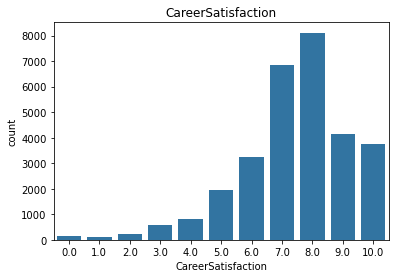

In [517]:
# CareerSatisfaction
base_color = sns.color_palette()[0]
sns.countplot(data=df, x='CareerSatisfaction', color=base_color);
plt.title('CareerSatisfaction');


>* Of those who responded, most of the ratings are 7 or 8, followed by those who rated 9 or 10.
>* A very small number of people ranked 0/1/2/3/4.
>* Therefore, most individuals are satisfied with their careers.

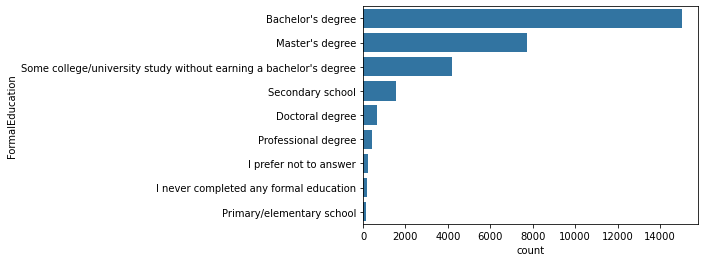

In [518]:
# FormalEducation
sorted_counts = df['FormalEducation'].value_counts() 
sns.countplot(y=df['FormalEducation'] , order = sorted_counts.index, color=base_color);


>* Most individuals have a Bachelor's degree / Master's degree / Some college / university without earning a bachelor's degree.
>* To facilitate the analysis, I will place all individuals who do not have a bachelor's / master's / doctorate in the same group: "without college degree".



In [519]:
# Renaming individuals without university degree 

def change_string(x):
    """ depois eu escrevo """
    if(x != "Bachelor's degree") and (x != "Master's degree") and (x != "Doctoral degree"):
        x = "Without college degree"
    return x

df['FormalEducation'] = df['FormalEducation'].map(change_string)


In [520]:
df['FormalEducation'].value_counts()

Bachelor's degree         15033
Master's degree            7751
Without college degree     6750
Doctoral degree             677
Name: FormalEducation, dtype: int64

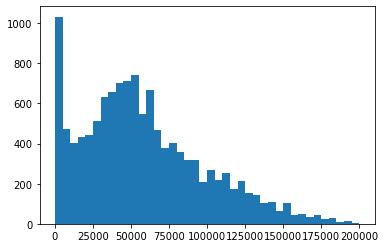

In [521]:
# Salary
bin_edges = np.arange(0, df['Salary'].max()+5000, 5000)
plt.hist(data=df, x='Salary', bins=bin_edges);

>* Note that the distribution resembles a right-skewed distribution. 
>* However, most individuals receive up to 5,000, which does not make much sense, as this would be too low for an annual salary.
>* Perhaps these individuals have put their monthly salary or hours worked. Thus, in future analyzes, we will consider individuals with salaries above $ 25,000, which is a reasonable amount for an annual minimum wage.

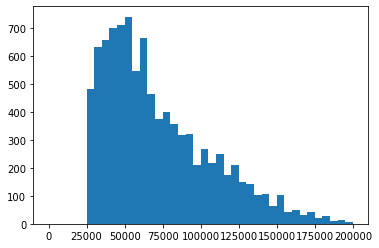

In [522]:
# Choose individuals with salary greater than 25000
df = df.query('Salary > 25000')
bin_edges = np.arange(0, df['Salary'].max()+5000, 5000)
plt.hist(data=df, x='Salary', bins=bin_edges);

### Bivariate Exploration

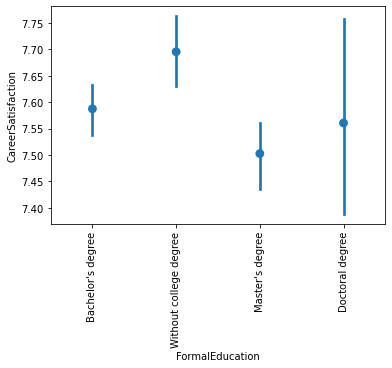

In [523]:
# CareerSatisfaction vs FormalEducation
sns.pointplot(data=df, x='FormalEducation', y='CareerSatisfaction', color=base_color, linestyles="");
plt.xticks(rotation=90);

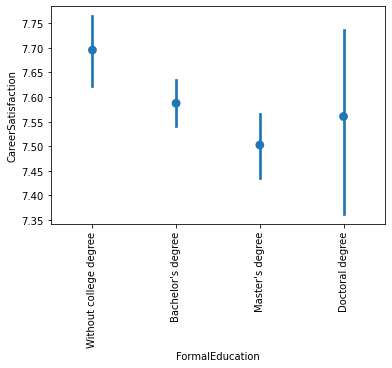

In [524]:
## Create a ordinal categorical type cat2

cat2 = CategoricalDtype(categories=["Without college degree", "Bachelor's degree", "Master's degree", "Doctoral degree" ],
                      ordered = True)

df.loc[:,['FormalEducation']] = df.loc[:,['FormalEducation']].astype(cat2, copy=True)

# CareerSatisfaction vs FormalEducation
sns.pointplot(data=df, x='FormalEducation', y='CareerSatisfaction', color=base_color, linestyles="");
plt.xticks(rotation=90);

   


In [525]:
df_2 = df[['FormalEducation', 'Salary', 'CareerSatisfaction']]
#df_2 = df_2.dropna()
df_2.groupby('FormalEducation').mean()['CareerSatisfaction'].sort_values(ascending=False)

FormalEducation
Without college degree    7.695511
Bachelor's degree         7.587315
Doctoral degree           7.560440
Master's degree           7.502459
Name: CareerSatisfaction, dtype: float64

In [526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9631 entries, 3 to 51391
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Professional              9631 non-null   object  
 1   EmploymentStatus          9631 non-null   object  
 2   FormalEducation           9631 non-null   category
 3   Salary                    9631 non-null   float64 
 4   CareerSatisfaction        9604 non-null   float64 
 5   EducationImportant        6785 non-null   category
 6   ImportantHiringEducation  6562 non-null   category
 7   NA_CareerSatisfaction     9631 non-null   bool    
dtypes: bool(1), category(3), float64(2), object(2)
memory usage: 734.4+ KB


> > On average, career satisfaction has close values, being higher for individuals without an academic degree (7.70), followed by those with a bachelor's degree (7.59), a doctorate (7.56) and a master's degree (7.50).

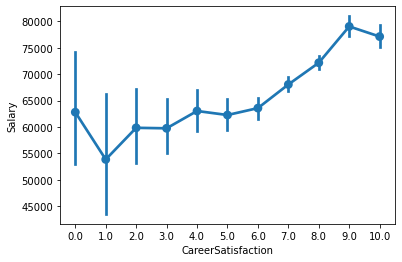

In [527]:
# CareerSatisfaction vs Salary
df.groupby('CareerSatisfaction').mean()['Salary']
sns.pointplot(data=df, x='CareerSatisfaction', y='Salary');

> On average, salaries are higher for individuals with greater career satisfaction, this indicates a positive correlation between the two variables.

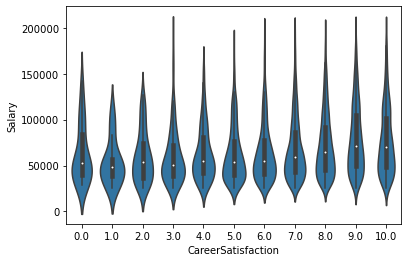

In [528]:
# CareerSatisfaction vs Salary
sns.violinplot(data=df, y='Salary', x='CareerSatisfaction', color=base_color);
#sns.boxplot(data=df, y='Salary', x='CareerSatisfaction', color=base_color);

>* The salary boxplots of individuals whose Career Satisfaction is between 7 and 10 have higher medians than those of the others.
>* At the same time, the violinplot shows that the distribution of these wages is more "spread" to higher levels of satisfaction.

## Business Understanding

#### Question 1:  How important is the level of education when hiring a software developer?


> To answer the question, let's look at the "ImportantHiringEducation" column, which refers to the question: "How important should be Education credentials in a hiring process?".
>
> The analyzed graph contains the percentage of individuals per response.


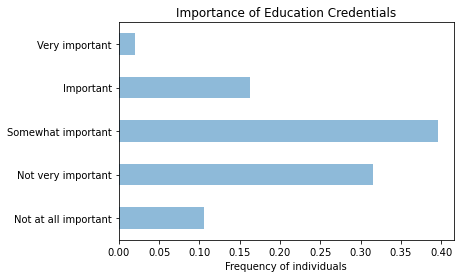

In [529]:
# ImportantHiringEducation
HiringEducation = df.groupby('ImportantHiringEducation').count().iloc[:,0]
HiringEducation = HiringEducation / HiringEducation.sum()
HiringEducation.plot.barh(alpha=0.5);
plt.xlabel('Frequency of individuals');
plt.ylabel('')
plt.title('Importance of Education Credentials');

> Most individuals consider an employee's education level between "Somewhat important" and "Not very important".
> However, to check if there is any bias dependent on the educational background of each individual, we will generate a single bar graph with the data divided between each group of the variable "FormalEducation".

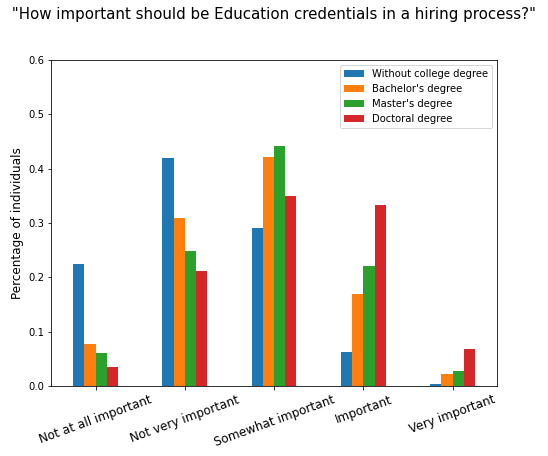

In [530]:
# ImportantHiringEducation por FormalEducation 

aux = df.groupby(['FormalEducation','ImportantHiringEducation']).count()['Professional'].rename('count') 
new_df = pd.DataFrame()

degrees = df['FormalEducation'].value_counts().index.categories
for degree in degrees:
    x = aux.loc[degree].rename(degree)
    new_df = pd.concat([new_df, pd.DataFrame(x)], axis=1)
    new_df[degree] = new_df[degree] / new_df[degree].sum()

new_df.plot.bar(alpha=1, figsize=(8,6), width=0.5);
plt.xticks(rotation=20, fontsize=12);
#plt.legend(bbox_to_anchor=(1, 1));
plt.xlabel('');
plt.title(' "How important should be Education credentials in a hiring process?" \n \n', fontsize=15);
plt.ylabel('Percentage of individuals', fontsize=12);
plt.ylim([0, 0.6]);
plt.savefig('education_hiring_bar.jpg', dpi=300, bbox_inches='tight')

> Now, we see that when it comes to hiring an employee, individuals with a doctorate are those who most consider education "important" or "very important", while those without an academic degree are those who least consider Education "important" / "very important" . The other groups have distributions closer to each other, but those with bachelor's degrees consider education a little less important than those with master's degrees.
> Therefore, there is a bias related to the educational background of those who hire.

 #### Question 2: How important is education in the developer's career? 


> To answer the question, let's look at the column "EducationImportant", which refers to the question: "Overall, how important has your formal schooling and education been to your career success?". 
>
> The analyzed graph contains the percentage of individuals per response.


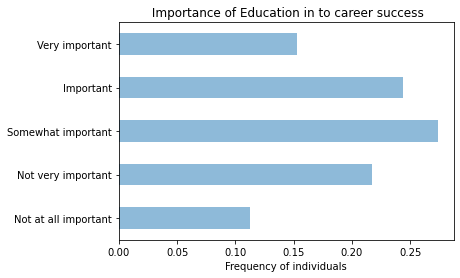

In [531]:
# EducationImportant

EducationImportant = df.groupby('EducationImportant').count().iloc[:,0]
EducationImportant = EducationImportant/ EducationImportant.sum()
EducationImportant.plot.barh(alpha=0.5);
plt.title(" Importance of Education in to career success");
plt.ylabel('');
plt.xlabel('Frequency of individuals');


> On average, this graph shows that most individuals consider Education to be "somewhat important" to "important" in a worker's career.
>
> However, let's do the same analysis for each group of "Formal Education".

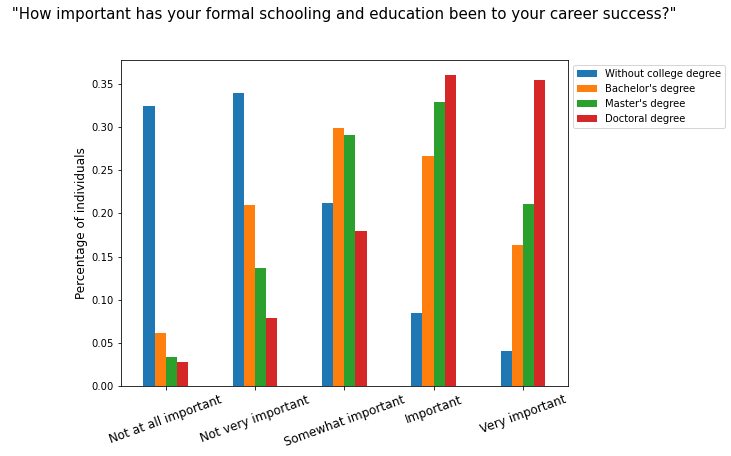

In [532]:
# EducationImportant

aux=df.groupby(['FormalEducation','EducationImportant']).count()['Professional'].rename('count') 
new_df = pd.DataFrame()

degrees = df['FormalEducation'].value_counts().index.categories
for degree in degrees:
    x = aux.loc[degree].rename(degree)
    new_df = pd.concat([new_df, pd.DataFrame(x)], axis=1)
    new_df[degree] = new_df[degree] / new_df[degree].sum()

new_df.plot.bar(figsize=(8,6), alpha=1, width=0.5);
plt.xticks(rotation=20, fontsize=12);
plt.legend(bbox_to_anchor=(1, 1));
plt.ylabel('Percentage of individuals', fontsize=12);
plt.title(' "How important has your formal schooling and education been to your career success?" \n \n', fontsize=15);
plt.xlabel("");
plt.savefig('education_bar.jpg', dpi=300, bbox_inches='tight')



> In this case, we have that most individuals with a doctorate consider education from "important" to "very important". While most of those with a master's degree consider education from "Somewhat important" to "very important". Those with bachelor's degrees are better distributed in each category, with the majority between "not very important" and "important". Finally, most individuals without an academic degree consider education between "Not at all important" and "Not very important".

> Therefore, the higher the developer's academic level, the higher the level of importance attributed to Education.


#### Question 3: Which habits are most related to career satisfaction?

> To answer this question, we will take into account the columns that appear with the answers to the following questions in the questionnaire.


* OtherPeoplesCode: Maintaining other people's code is a form of torture
* EnjoyDebugging: I enjoy debugging code
* DifficultCommunication: I have difficulty communicating my ideas to my peers
* UnderstandComputers: "Honestly, there's a lot about computers that I just don't understand"
* ShipIt: It's better to ship now and optimize later
* CompetePeers: I think of myself as competing with my peers
* ChallengeMyself: I like to challenge myself
* WorkPayCare: "I don't really care what I work on, so long as I'm paid well"
* SeriousWork: I take my work very seriously
* ProgramHobby: Do you program as a hobby or contribute to open source projects?


> Dependent Variable

* CareerSatisfaction: Career satisfaction rating


In [533]:
df = data.query('Professional == "Professional developer" and EmploymentStatus == "Employed full-time" and Salary >25000')

cols2 = ['OtherPeoplesCode', 'EnjoyDebugging', 'ShipIt', 'DifficultCommunication', 'CompetePeers',
         'ChallengeMyself', 'WorkPayCare', 'SeriousWork', 'UnderstandComputers', 'ProgramHobby', 
         'CareerSatisfaction', 'Salary']

df = df[cols2]

In [534]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9631 entries, 3 to 51391
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OtherPeoplesCode        6685 non-null   object 
 1   EnjoyDebugging          6682 non-null   object 
 2   ShipIt                  6688 non-null   object 
 3   DifficultCommunication  6683 non-null   object 
 4   CompetePeers            6668 non-null   object 
 5   ChallengeMyself         6669 non-null   object 
 6   WorkPayCare             6682 non-null   object 
 7   SeriousWork             6670 non-null   object 
 8   UnderstandComputers     6676 non-null   object 
 9   ProgramHobby            9631 non-null   object 
 10  CareerSatisfaction      9604 non-null   float64
 11  Salary                  9631 non-null   float64
dtypes: float64(2), object(10)
memory usage: 978.1+ KB


In [535]:
df=df.dropna(axis=0, subset= ['CareerSatisfaction'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9604 entries, 3 to 51391
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OtherPeoplesCode        6665 non-null   object 
 1   EnjoyDebugging          6662 non-null   object 
 2   ShipIt                  6668 non-null   object 
 3   DifficultCommunication  6664 non-null   object 
 4   CompetePeers            6650 non-null   object 
 5   ChallengeMyself         6651 non-null   object 
 6   WorkPayCare             6664 non-null   object 
 7   SeriousWork             6652 non-null   object 
 8   UnderstandComputers     6658 non-null   object 
 9   ProgramHobby            9604 non-null   object 
 10  CareerSatisfaction      9604 non-null   float64
 11  Salary                  9604 non-null   float64
dtypes: float64(2), object(10)
memory usage: 975.4+ KB


In [536]:
df['CompetePeers'].value_counts()


Disagree             2420
Somewhat agree       1818
Agree                1222
Strongly disagree     825
Strongly agree        365
Name: CompetePeers, dtype: int64

In [537]:
## Create a ordinal categorical type cat3

cat3 = CategoricalDtype(categories=['Strongly disagree', 'Disagree', 'Somewhat agree', 'Agree', 'Strongly agree'],
                      ordered = True)
df[cols2[:-3]] = df[cols2[:-3]].astype(cat3)


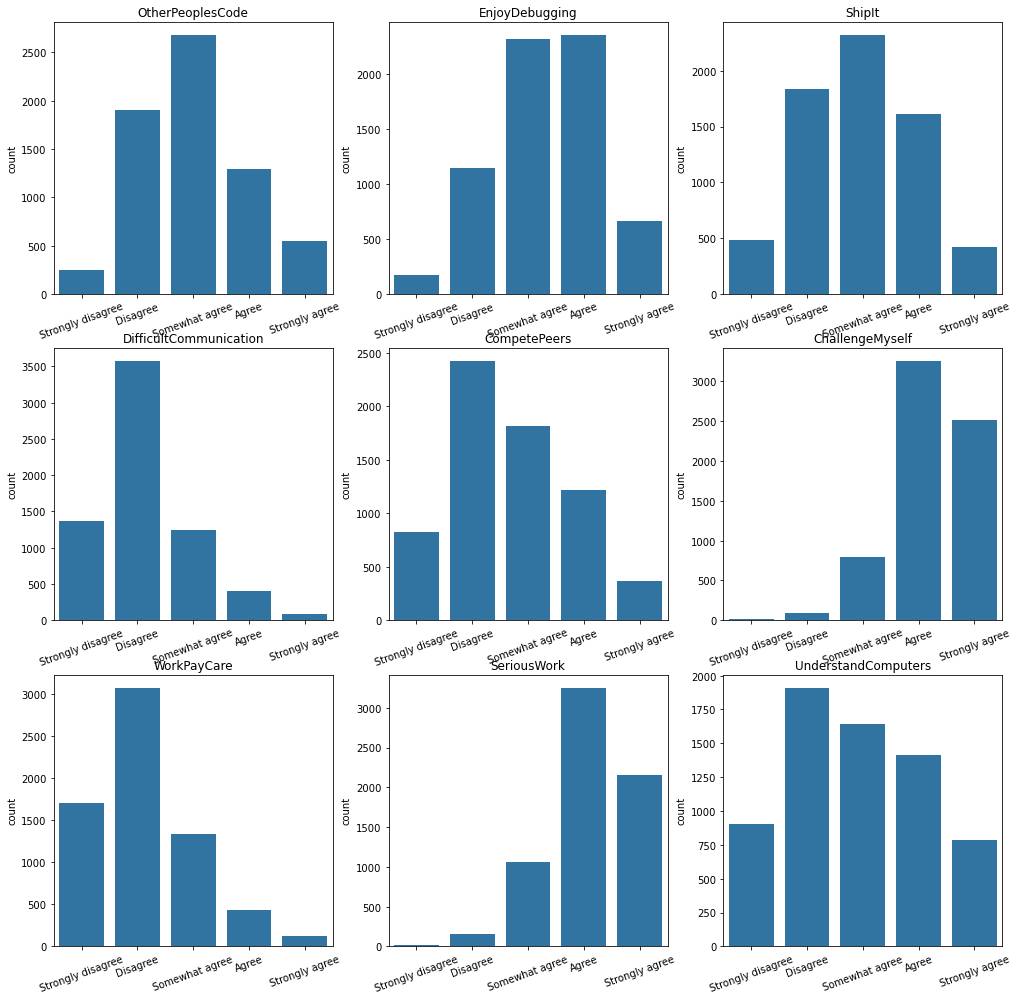

In [538]:
# Univariate Exploration

# Count plot of features
base_color=sns.color_palette()[0]

i=1
plt.figure(figsize=(17,17))
for col in cols2[:-3]:
    plt.subplot(3,3,i)
    sns.countplot(data=df, x=col, color=base_color)
    plt.xticks(rotation=20);
    plt.xlabel("")
    plt.title(col)
    i = i+1

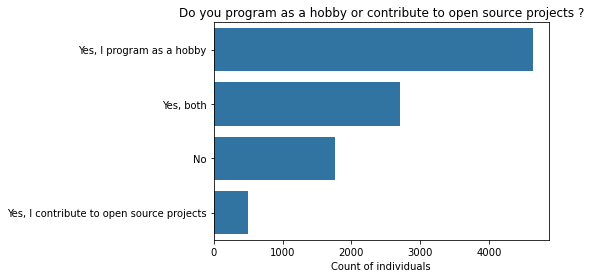

In [539]:
# ProgramHobby
sorted_values = df['ProgramHobby'].value_counts().index
sns.countplot(data=df, y='ProgramHobby', order=sorted_values, color=base_color);
plt.title("Do you program as a hobby or contribute to open source projects ?");
plt.ylabel("");
plt.xlabel('Count of individuals');

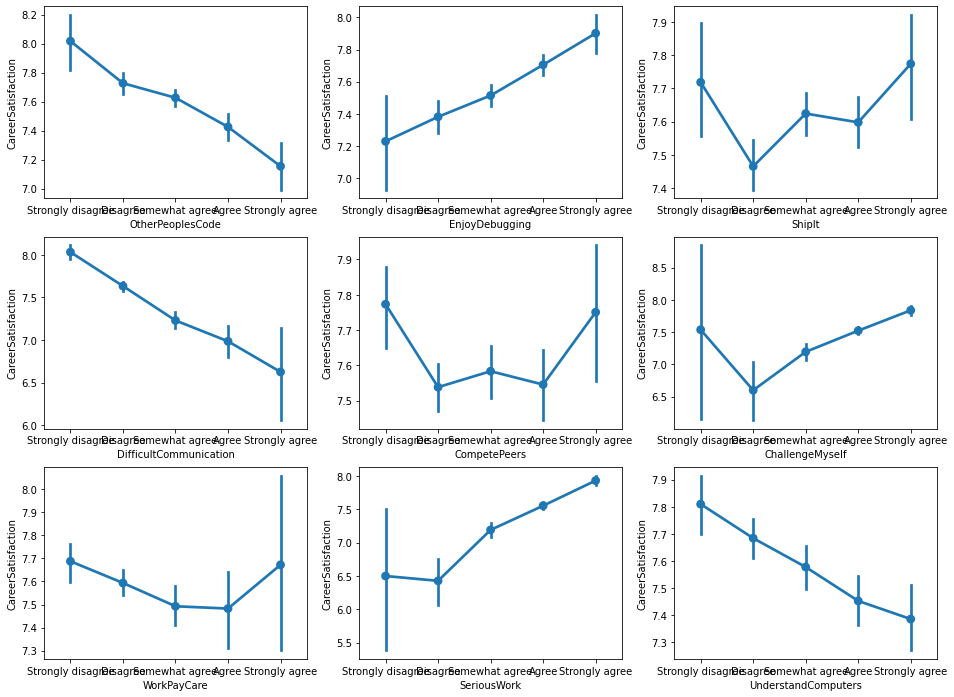

In [540]:
# Bivariate Exploration

# cols2 vs CareerSatis
i=1
plt.figure(figsize=(16,12))
for col in cols2[:-3]:
    plt.subplot(3,3,i)
    sns.pointplot(data=df, x= col, y='CareerSatisfaction')
    i=i+1

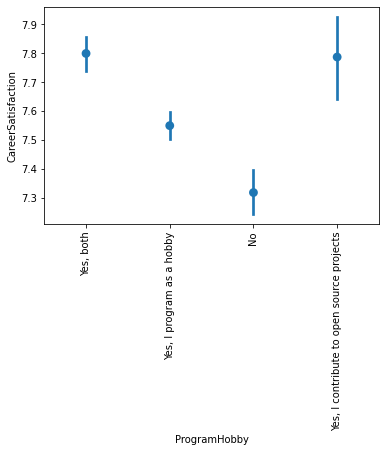

In [541]:
# CareerSatisfaction vs ProgramHobby
ax = sns.pointplot(data=df, x='ProgramHobby', y='CareerSatisfaction', linestyles='')
plt.xticks(rotation=90);

In [542]:
df.groupby('ProgramHobby').mean()['CareerSatisfaction'].sort_values(ascending=False)

ProgramHobby
Yes, both                                    7.799409
Yes, I contribute to open source projects    7.787018
Yes, I program as a hobby                    7.549278
No                                           7.317487
Name: CareerSatisfaction, dtype: float64

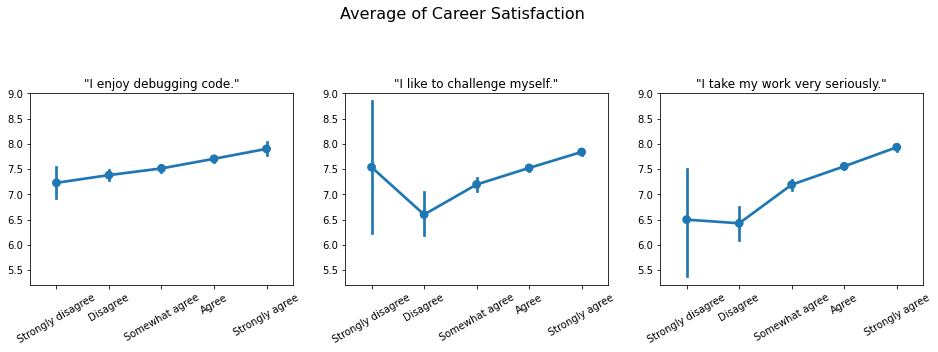

In [543]:
# Save figure to medium post

fig1 = plt.figure(figsize=(16,12));
fig1.suptitle('Average of Career Satisfaction', fontsize=16)

plt.subplot(3,3,1);
sns.pointplot(data=df, x= 'EnjoyDebugging', y='CareerSatisfaction');
plt.ylabel("");
plt.ylim(5.2,9);
plt.xlabel("");
plt.xticks(rotation=30);
plt.title('"I enjoy debugging code."');

plt.subplot(3,3,2);
sns.pointplot(data=df, x= 'ChallengeMyself', y='CareerSatisfaction');
plt.ylim(5.2,9);
plt.xlabel("");
plt.xticks(rotation=30);
plt.title('"I like to challenge myself."');
plt.ylabel("");

plt.subplot(3,3,3);
sns.pointplot(data=df, x= 'SeriousWork', y='CareerSatisfaction');
plt.ylim(5.2,9);
plt.xlabel("");
plt.xticks(rotation=30);
plt.title('"I take my work very seriously."');
plt.ylabel("");
plt.savefig("avg_career_sat_positive.jpeg", dpi=300, bbox_inches='tight')

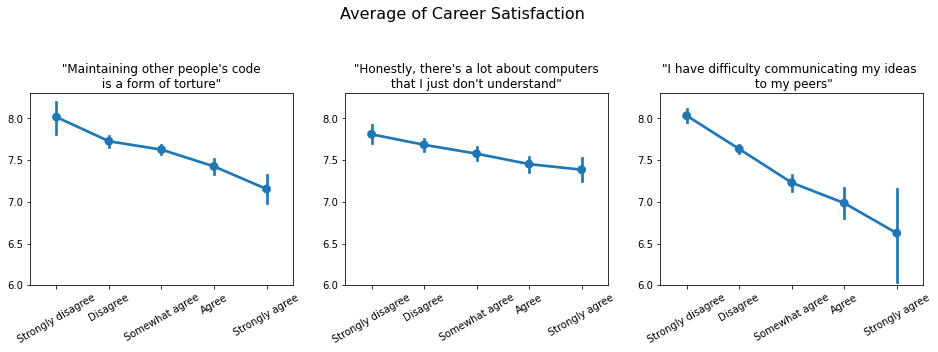

In [544]:
# Save figure to medium post
fig2 = plt.figure(figsize=(16,12));
fig2.suptitle('Average of Career Satisfaction', fontsize=16)


plt.subplot(3,3,1);
sns.pointplot(data=df, x= 'OtherPeoplesCode', y='CareerSatisfaction');
plt.ylabel("");
plt.ylim(6,8.3);
plt.xlabel("");
plt.xticks(rotation=30);
plt.title(""" "Maintaining other people's code \n is a form of torture" """)

plt.subplot(3,3,2);
sns.pointplot(data=df, x= 'UnderstandComputers', y='CareerSatisfaction');
plt.ylim(6,8.3);
plt.xlabel("");
plt.ylabel("");
plt.xticks(rotation=30);
plt.title(""" "Honestly, there's a lot about computers \n that I just don't understand" """);

plt.subplot(3,3,3);
sns.pointplot(data=df, x= 'DifficultCommunication', y='CareerSatisfaction');
plt.ylim(6,8.3);
plt.xlabel('');
plt.ylabel("");
plt.title('"I have difficulty communicating my ideas \n to my peers"');

plt.xticks(rotation=30);
plt.savefig("avg_career_sat_negative.jpeg", dpi=300, bbox_inches='tight')

#### Question 4: What habits are related to the best salaries?


> To answer this question, we will take into account the columns that appear with the answers to the following questions in the questionnaire.


* OtherPeoplesCode: Maintaining other people's code is a form of torture
* EnjoyDebugging: I enjoy debugging code
* DifficultCommunication: I have difficulty communicating my ideas to my peers
* UnderstandComputers: "Honestly, there's a lot about computers that I just don't understand"
* ShipIt: It's better to ship now and optimize later
* CompetePeers: I think of myself as competing with my peers
* ChallengeMyself: I like to challenge myself
* WorkPayCare: "I don't really care what I work on, so long as I'm paid well"
* SeriousWork: I take my work very seriously
* ProgramHobby: Do you program as a hobby or contribute to open source projects?

> Dependent Variable

* Salary: "What is your current annual base salary, before taxes, and excluding bonuses, grants, or other compensation?"


In [545]:
df = data.query('Professional == "Professional developer" and EmploymentStatus == "Employed full-time" and Salary >25000')
df = df[cols2]

In [546]:
df = df.dropna(axis=0, subset= ['Salary'])
df[cols2[:-3]]= df[cols2[:-3]].astype(cat3)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9631 entries, 3 to 51391
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   OtherPeoplesCode        6685 non-null   category
 1   EnjoyDebugging          6682 non-null   category
 2   ShipIt                  6688 non-null   category
 3   DifficultCommunication  6683 non-null   category
 4   CompetePeers            6668 non-null   category
 5   ChallengeMyself         6669 non-null   category
 6   WorkPayCare             6682 non-null   category
 7   SeriousWork             6670 non-null   category
 8   UnderstandComputers     6676 non-null   category
 9   ProgramHobby            9631 non-null   object  
 10  CareerSatisfaction      9604 non-null   float64 
 11  Salary                  9631 non-null   float64 
dtypes: category(9), float64(2), object(1)
memory usage: 387.4+ KB


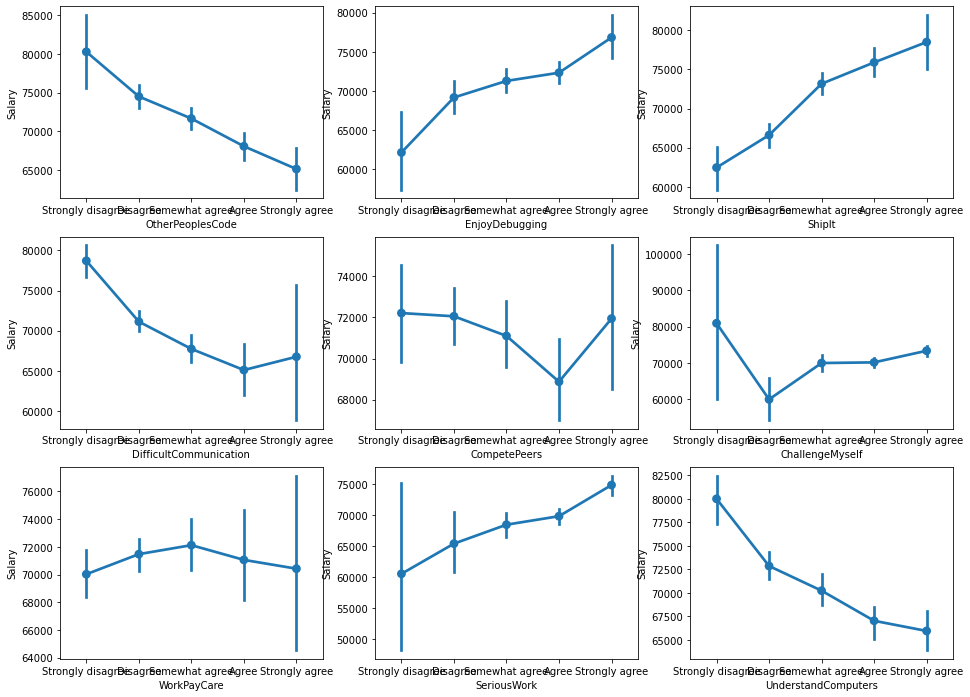

In [547]:
# cols2 vs Salary
i=1
plt.figure(figsize=(16,12))
for col in cols2[:-3]:
    plt.subplot(3,3,i)
    sns.pointplot(data=df, x= col, y='Salary')
    i=i+1

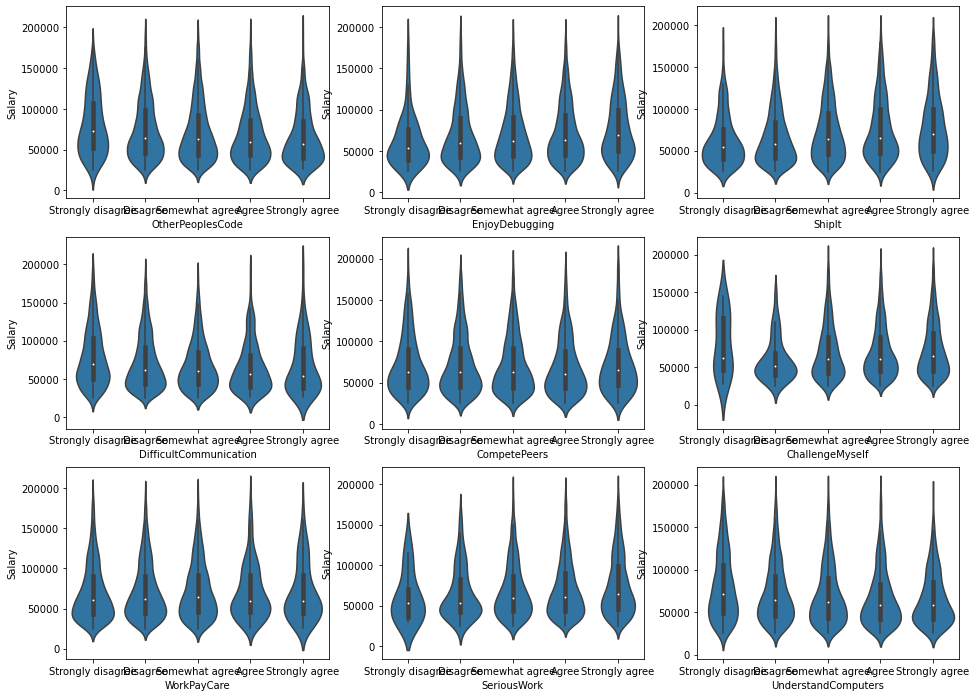

In [548]:
# cols2 vs Salary - Violin plots
i=1
plt.figure(figsize=(16,12))
for col in cols2[:-3]:
    
    plt.subplot(3,3,i)
    sns.violinplot(data=df, x=col, y="Salary", color=base_color)
    i=i+1

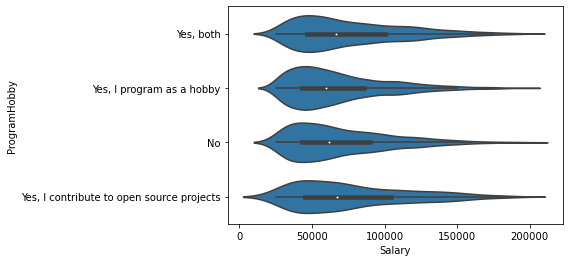

In [549]:
# ProgramHobby
sns.violinplot(data=df, y='ProgramHobby', x='Salary', color=base_color);

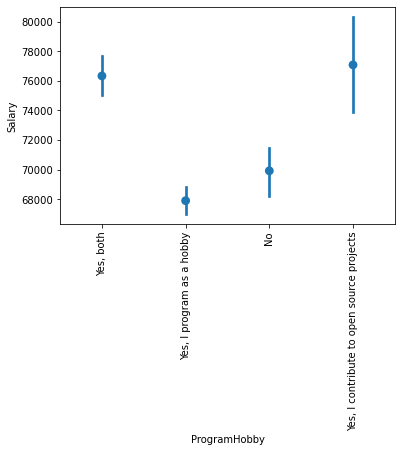

In [550]:
# Salary vs ProgramHobby
ax = sns.pointplot(data=df, x='ProgramHobby', y='Salary', linestyles='')
plt.xticks(rotation=90);

In [551]:
salary_prg_hobby = df.groupby('ProgramHobby').mean()['Salary'].sort_values(ascending=False)
salary_prg_hobby

ProgramHobby
Yes, I contribute to open source projects    77087.380575
Yes, both                                    76338.493668
No                                           69912.791026
Yes, I program as a hobby                    67890.740061
Name: Salary, dtype: float64

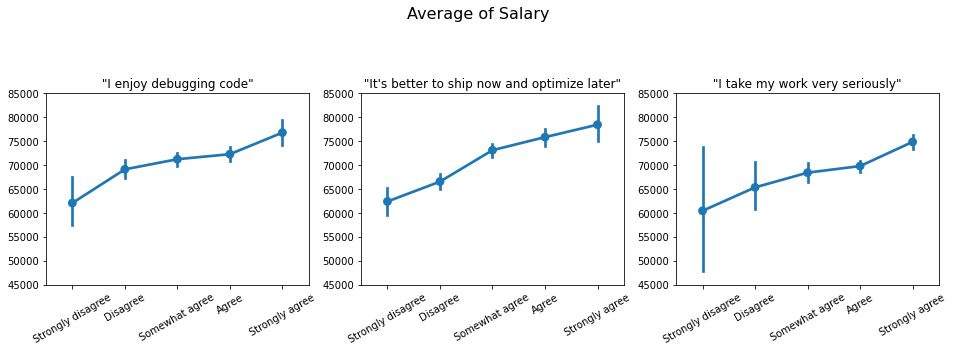

In [552]:
# Save figure to medium post
fig3 = plt.figure(figsize=(16,12));
fig3.suptitle('Average of Salary', fontsize=16)
plt.subplot(3,3,1);
sns.pointplot(data=df, x= 'EnjoyDebugging', y='Salary');
plt.ylim(45000,85000);
plt.xlabel("");
plt.ylabel("");
plt.title(' "I enjoy debugging code" ')
plt.xticks(rotation=30);

plt.subplot(3,3,2);
sns.pointplot(data=df, x= 'ShipIt', y='Salary');
plt.xlabel("");
plt.xticks(rotation=30);
plt.ylabel("");
plt.title(""" "It's better to ship now and optimize later" """);
plt.ylim(45000,85000);

 
plt.subplot(3,3,3);
sns.pointplot(data=df, x= 'SeriousWork', y='Salary');
plt.xlabel("");
plt.xticks(rotation=30);
plt.ylabel("");
plt.title(' "I take my work very seriously" ');
plt.ylim(45000,85000);
plt.savefig('avg_sal_positive.jpg', dpi=300, bbox_inches='tight')

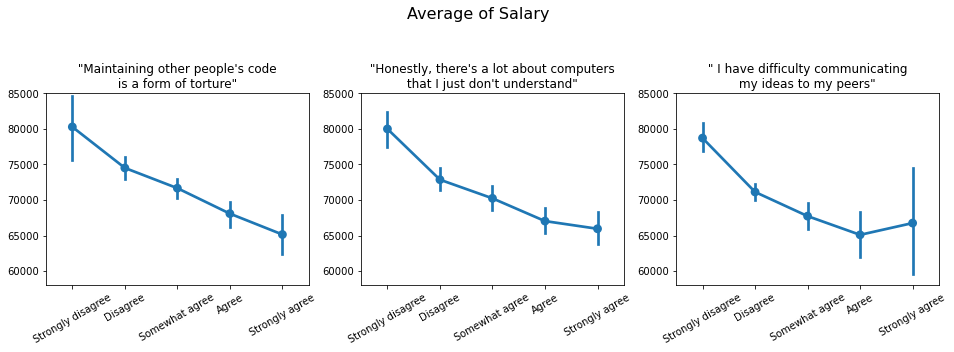

In [553]:
# Save figure to medium post
fig4 = plt.figure(figsize=(16,12))
fig4.suptitle("Average of Salary", fontsize=16)
plt.subplot(3,3,1);
sns.pointplot(data=df, x= 'OtherPeoplesCode', y='Salary');
plt.ylabel("");
plt.ylim(58000,85000);
plt.xlabel("");
plt.xticks(rotation=30);
plt.title(""" "Maintaining other people's code \n is a form of torture" """);

plt.subplot(3,3,2);
sns.pointplot(data=df, x= 'UnderstandComputers', y='Salary');
plt.xlabel("");
plt.xticks(rotation=30);
plt.ylabel("");
plt.ylim(58000,85000);
plt.title(""" "Honestly, there's a lot about computers \n that I just don't understand" """);

plt.subplot(3,3,3);
sns.pointplot(data=df, x= 'DifficultCommunication', y='Salary');
#plt.ylim(5.2,9);
plt.xlabel("");
plt.xticks(rotation=30);
plt.ylabel("");
plt.ylabel("");
plt.ylim(58000,85000);
plt.title(""" " I have difficulty communicating \n my ideas to my peers" """);
plt.savefig('avg_sal_negative.jpg', dpi=300, bbox_inches='tight')
